# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
from scipy.stats import pearsonr # Python module for correlation calculations
# Python's SQLite library 
import sqlite3
# Connects to the SQLite database
import pandas as pd 
# Reads data from the database into a dataframe, etc...
import seaborn as sns
# For plotting data
import matplotlib.pyplot as plt

In [2]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect('db/Market.db')

# TODO: Set up the cursor
cursor=conn.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [3]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT COUNT(*) AS 'num_Products < €10'
FROM Products p 
WHERE p.price < 10
""")

# Fetch results from query
products = cursor.fetchall()
for product in products:
    print(product[0])

11


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, count(*) AS num_suppliers
FROM suppliers 
GROUP BY country 
ORDER BY num_suppliers DESC
;
""")

# TODO: Fetch your list of tuples and print it out
num_suppliers = cursor.fetchall()
# Number of suppliers per country
for num_supplier in num_suppliers:
    print(num_supplier)

('USA', 4)
('Germany', 3)
('France', 3)
('UK', 2)
('Sweden', 2)
('Japan', 2)
('Italy', 2)
('Canada', 2)
('Australia', 2)
('Spain', 1)
('Singapore', 1)
('Norway', 1)
('Netherlands', 1)
('Finland', 1)
('Denmark', 1)
('Brazil', 1)


In [6]:
# list of tuples of suppliers per country
num_suppliers

[('USA', 4),
 ('Germany', 3),
 ('France', 3),
 ('UK', 2),
 ('Sweden', 2),
 ('Japan', 2),
 ('Italy', 2),
 ('Canada', 2),
 ('Australia', 2),
 ('Spain', 1),
 ('Singapore', 1),
 ('Norway', 1),
 ('Netherlands', 1),
 ('Finland', 1),
 ('Denmark', 1),
 ('Brazil', 1)]

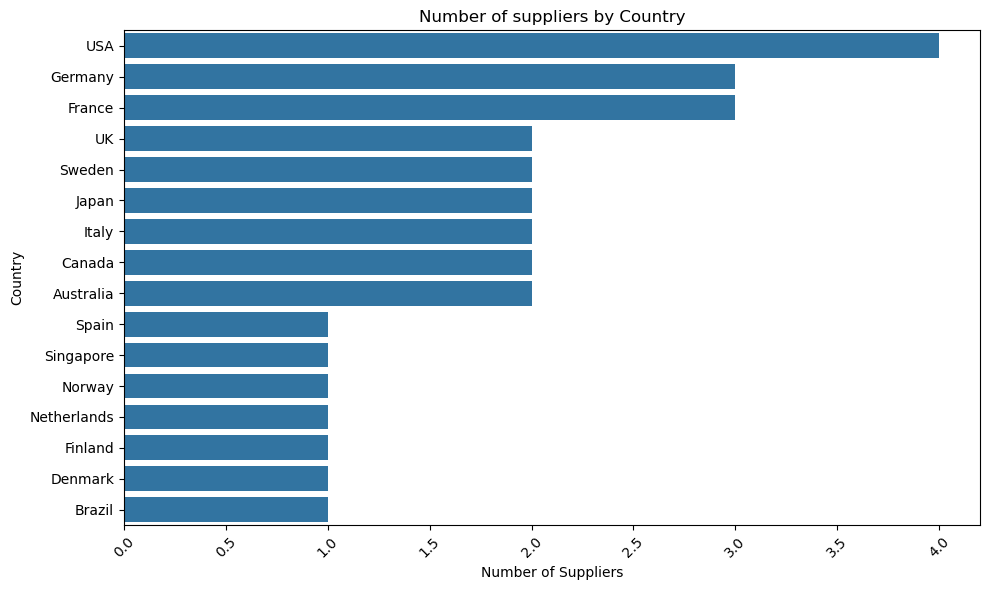

In [7]:
# TODO: Convert your list of tuples to a dataframe
num_suppliers_df = pd.DataFrame(num_suppliers, columns=['Country', 'num_suppliers'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='num_suppliers', y='Country', data=num_suppliers_df)
plt.title('Number of suppliers by Country')
plt.xlabel('Number of Suppliers')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [8]:

# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, COUNT(*) AS num_customer
FROM Customers
GROUP BY Country 
ORDER BY num_customer DESC
;
""")

# TODO: Fetch your list of tuples and print it out
num_customers = cursor.fetchall()
for num_customer in num_customers:
    print(num_customer)


('USA', 13)
('Germany', 11)
('France', 11)
('Brazil', 9)
('UK', 7)
('Spain', 5)
('Mexico', 5)
('Venezuela', 4)
('Italy', 3)
('Canada', 3)
('Argentina', 3)
('Switzerland', 2)
('Sweden', 2)
('Portugal', 2)
('Finland', 2)
('Denmark', 2)
('Belgium', 2)
('Austria', 2)
('Poland', 1)
('Norway', 1)
('Ireland', 1)


In [9]:
# Number of customers by country 
num_customers

[('USA', 13),
 ('Germany', 11),
 ('France', 11),
 ('Brazil', 9),
 ('UK', 7),
 ('Spain', 5),
 ('Mexico', 5),
 ('Venezuela', 4),
 ('Italy', 3),
 ('Canada', 3),
 ('Argentina', 3),
 ('Switzerland', 2),
 ('Sweden', 2),
 ('Portugal', 2),
 ('Finland', 2),
 ('Denmark', 2),
 ('Belgium', 2),
 ('Austria', 2),
 ('Poland', 1),
 ('Norway', 1),
 ('Ireland', 1)]

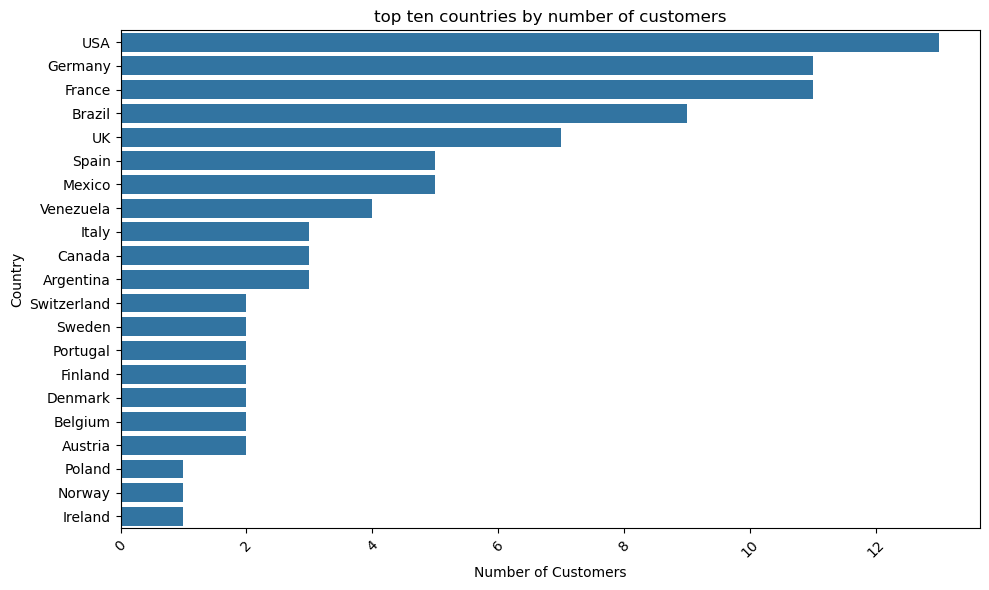

In [10]:
# TODO: Convert your list of tuples to a dataframe
num_customers_df = pd.DataFrame(num_customers, columns=['Country', 'num_customers'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(data=num_customers_df, x='num_customers', y='Country')
plt.title('top ten countries by number of customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [11]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.ProductName, SUM(od.Quantity) AS total_quantity_ordered
FROM products p JOIN OrderDetails od 
ON p.ProductID = od.ProductID
GROUP BY ProductName 
ORDER BY total_quantity_ordered ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
lst_pop_prod = cursor.fetchall()
# List of tuples
lst_pop_prod


[('Laughing Lumberjack Lager', 5),
 ('Røgede sild', 15),
 ("Gustaf's Knäckebröd", 18),
 ('Mishi Kobe Niku', 20),
 ('Genen Shouyu', 25),
 ("Uncle Bob's Organic Dried Pears", 25),
 ('Queso Manchego La Pastora', 27),
 ("Grandma's Boysenberry Spread", 36),
 ('Gravad lax', 39),
 ('Röd Kaviar', 45),
 ('Filo Mix', 48),
 ('Mascarpone Fabioli', 52),
 ('Chocolade', 70),
 ('Valkoinen suklaa', 70),
 ('NuNuCa Nuß-Nougat-Creme', 71),
 ('Singaporean Hokkien Fried Mee', 77),
 ('Aniseed Syrup', 80),
 ('Ikura', 85),
 ('Louisiana Hot Spiced Okra', 90),
 ('Schoggi Schokolade', 90)]

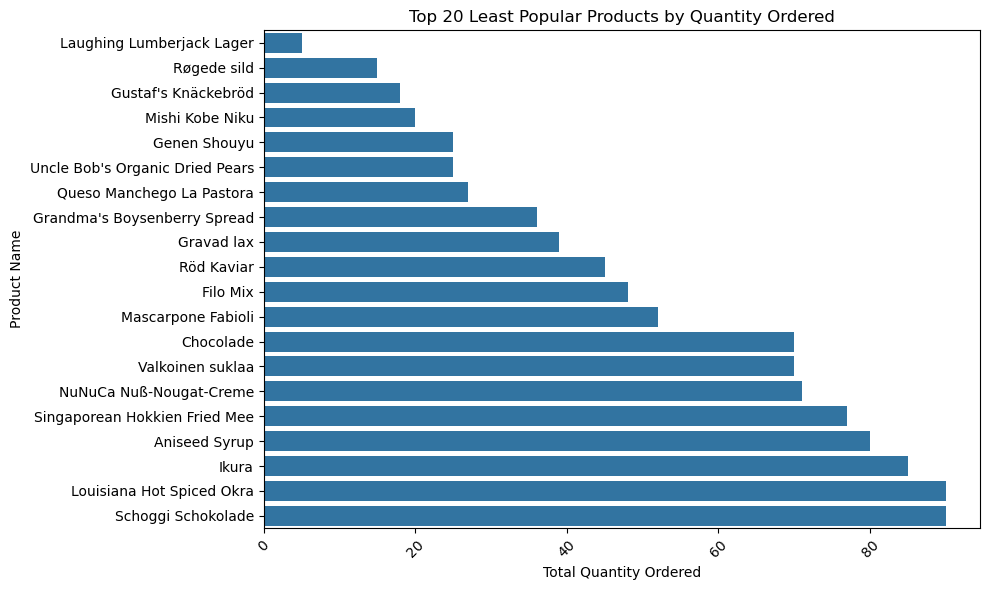

In [12]:
# TODO: Convert your list of tuples to a dataframe
lst_pop_prod_df = pd.DataFrame(lst_pop_prod, columns=['ProductName', 'total_quantity_ordered'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='total_quantity_ordered', y='ProductName', data=lst_pop_prod_df)
plt.title('Top 20 Least Popular Products by Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [13]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT p.ProductName, SUM(od.Quantity*price) AS total_revenue
FROM products p JOIN OrderDetails od 
ON p.ProductID = od.ProductID
GROUP BY ProductName 
ORDER BY total_revenue ASC
LIMIT 20;             
""")

# TODO: Fetch your list of tuples and print it out
lst_pop_prod_revenue = cursor.fetchall()
# List of tuples
lst_pop_prod_revenue

[('Laughing Lumberjack Lager', 70),
 ('Røgede sild', 142.5),
 ('Filo Mix', 336),
 ("Gustaf's Knäckebröd", 378),
 ('Genen Shouyu', 387.5),
 ('Konbu', 552),
 ('Röd Kaviar', 675),
 ('Guaraná Fantástica', 711.0),
 ("Uncle Bob's Organic Dried Pears", 750),
 ('Geitost', 790.0),
 ('Aniseed Syrup', 800),
 ('Chocolade', 892.5),
 ("Grandma's Boysenberry Spread", 900),
 ('Zaanse koeken', 959.5),
 ('NuNuCa Nuß-Nougat-Creme', 994),
 ('Gravad lax', 1014),
 ('Queso Manchego La Pastora', 1026),
 ('Singaporean Hokkien Fried Mee', 1078),
 ('Rhönbräu Klosterbier', 1116.0),
 ('Valkoinen suklaa', 1137.5)]

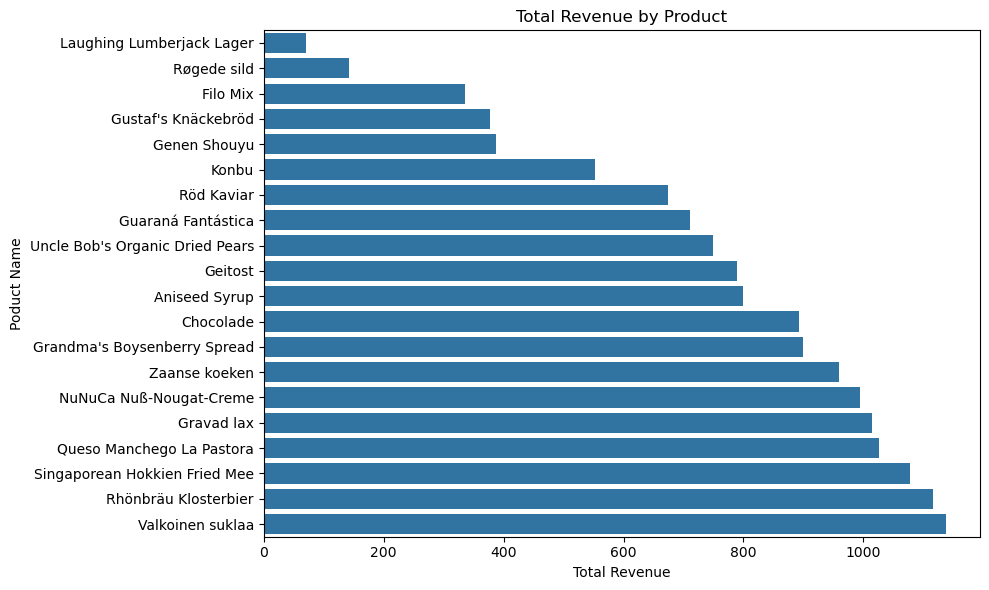

In [15]:
# TODO: Convert your list of tuples to a dataframe
lst_pop_prod_revenue_df = pd.DataFrame(lst_pop_prod_revenue, columns=['ProductName', 'total_revenue'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='total_revenue', y='ProductName', data=lst_pop_prod_revenue_df)
plt.title('Total Revenue by Product')
plt.xlabel('Total Revenue')
plt.ylabel('Poduct Name')
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [16]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT Country, COUNT(o.OrderID) AS most_orders
FROM Orders o JOIN Customers c 
ON o.CustomerID = c.CustomerID
GROUP BY Country 
ORDER BY most_orders DESC
Limit 8;
""")
# TODO: Fetch your list of tuples and print it out
most_orders = cursor.fetchall()
# List of tuples
most_orders

[('USA', 29),
 ('Germany', 25),
 ('Brazil', 19),
 ('France', 18),
 ('Austria', 13),
 ('UK', 12),
 ('Venezuela', 9),
 ('Mexico', 9)]

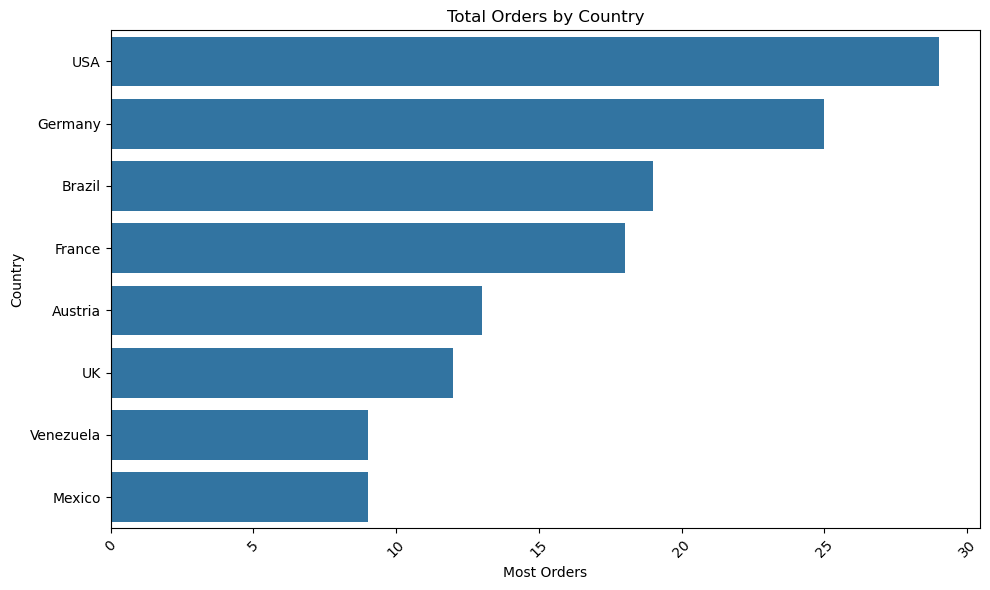

In [17]:
# TODO: Convert your list of tuples to a dataframe
most_orders_df = pd.DataFrame(most_orders, columns=['Country', 'most_orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='most_orders', y='Country', data=most_orders_df)
plt.title('Total Orders by Country')
plt.xlabel('Most Orders')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [18]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT Country, COUNT(*) AS no_orders
FROM Customers c LEFT JOIN Orders o 
ON c.CustomerID = o.CustomerID
WHERE o.OrderID IS null
GROUP BY Country
ORDER BY no_orders DESC;
""")

# TODO: Fetch your list of tuples and print it out
no_orders = cursor.fetchall()
# List of tuples
no_orders

[('USA', 5),
 ('France', 4),
 ('Germany', 2),
 ('Argentina', 2),
 ('UK', 1),
 ('Spain', 1),
 ('Canada', 1),
 ('Belgium', 1)]

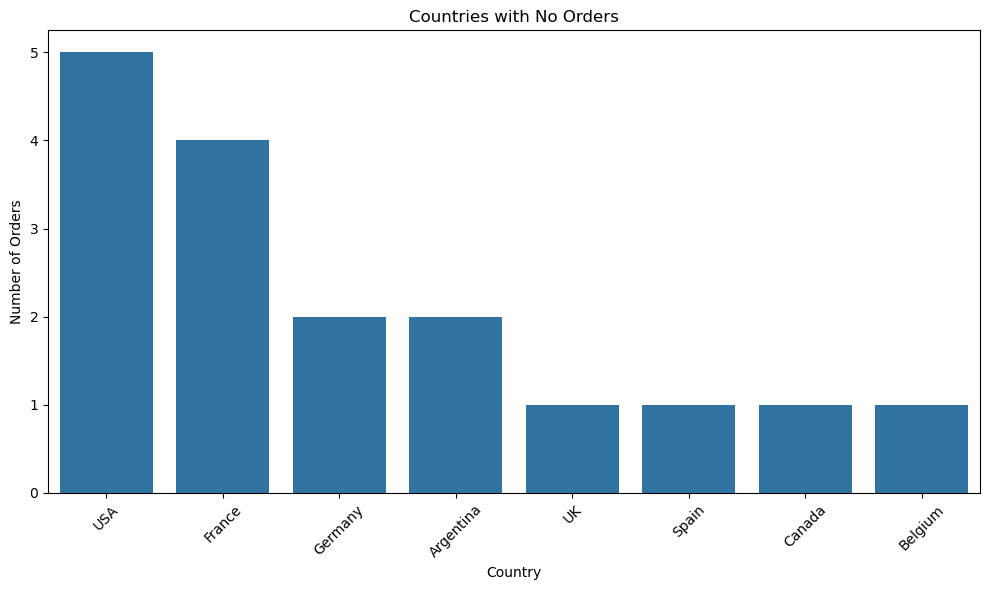

In [20]:
# TODO: Convert your list of tuples to a dataframe
no_orders_df  = pd.DataFrame(no_orders, columns=['Country', 'no_orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='no_orders', data=no_orders_df)
plt.title('Countries with No Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [19]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT s.SupplierName, count(DISTINCT orderID) AS most_popular
FROM Suppliers s 
JOIN Products p ON s.SupplierID = p.SupplierID
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY s.SupplierName 
ORDER BY most_popular DESC
LIMIT 10; 
""")

# TODO: Fetch your list of tuples and print it out
most_popular = cursor.fetchall()
# List of tuples
most_popular

[('Plutzer Lebensmittelgroßmärkte AG', 37),
 ('Pavlova, Ltd.', 37),
 ('Specialty Biscuits, Ltd.', 33),
 ('Norske Meierier', 30),
 ('Formaggi Fortini s.r.l.', 27),
 ('Gai pâturage', 26),
 ('Exotic Liquid', 21),
 ('Pasta Buttini s.r.l.', 20),
 ('New Orleans Cajun Delights', 20),
 ('Ma Maison', 19)]

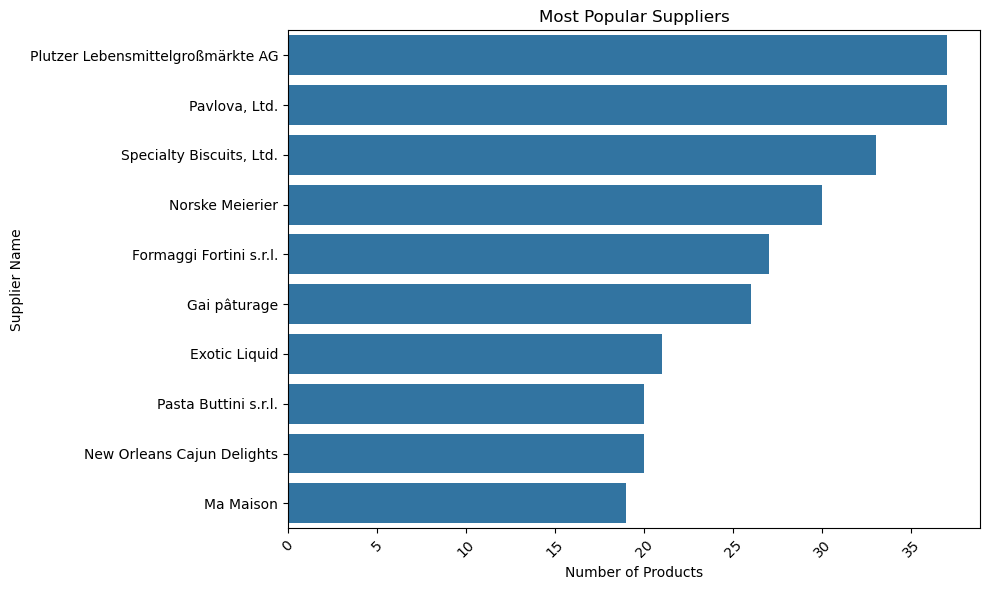

In [21]:
# TODO: Convert your list of tuples to a dataframe
most_popular_df = pd.DataFrame(most_popular, columns=['SupplierName', 'most_popular'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10,6))
sns.barplot(x='most_popular', y='SupplierName', data=most_popular_df)
plt.title('Most Popular Suppliers')
plt.xlabel('Number of Products')
plt.ylabel('Supplier Name')
plt.xticks(rotation=45)
plt.tight_layout()

In [22]:
# Question 1: EDA 
# Number of suppliers by country 
num_suppliers_df

,Country,num_suppliers
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2
5,Japan,2
6,Italy,2
7,Canada,2
8,Australia,2
9,Spain,1


In [23]:
# number of custoemrs by country
num_customers_df

,Country,num_customers
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Spain,5
6,Mexico,5
7,Venezuela,4
8,Italy,3
9,Canada,3


In [27]:
# Merge and clean
sup_cus_merge_df = pd.merge(num_customers_df, num_suppliers_df, on='Country', how='outer').fillna(0)
sup_cus_merge_df['num_customers'] = sup_cus_merge_df['num_customers'].astype(int)
sup_cus_merge_df['num_suppliers'] = sup_cus_merge_df['num_suppliers'].astype(int)

# Display the merged dataframe
sup_cus_merge_df

,Country,num_customers,num_suppliers
0,Argentina,3,0
1,Australia,0,2
2,Austria,2,0
3,Belgium,2,0
4,Brazil,9,1
5,Canada,3,2
6,Denmark,2,1
7,Finland,2,1
8,France,11,3
9,Germany,11,3


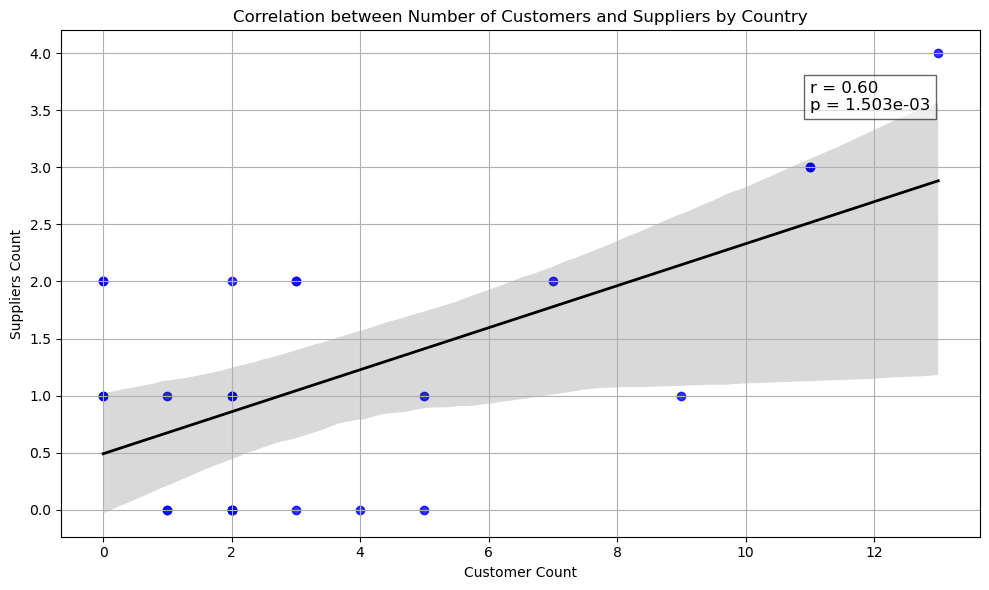

In [ ]:
# Calculate correlation coefficient between number of customers and suppliers
r_value, p_value = pearsonr(x=sup_cus_merge_df['num_customers'], y=sup_cus_merge_df['num_suppliers'])

# Create scatterplot
plt.figure(figsize=(10,6))
sns.regplot(data=sup_cus_merge_df, x='num_customers', y='num_suppliers', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
plt.text(
    x=sup_cus_merge_df['num_customers'].max() - 2,
    y=sup_cus_merge_df['num_suppliers'].max() - 0.5,
    s=f"r = {r_value:.2f}\np = {p_value:.3e}",
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.6)
)

# set plot title and axis labels 
plt.title("Correlation between Number of Customers and Suppliers by Country")
plt.xlabel("Customer Count") 
plt.ylabel("Suppliers Count")
plt.tight_layout()
plt.grid(True) 


In [29]:
# Question 2: EDA
# least popular products by total quantity ordered
lst_pop_prod_df

,ProductName,total_quantity_ordered
0,Laughing Lumberjack Lager,5
1,Røgede sild,15
2,Gustaf's Knäckebröd,18
3,Mishi Kobe Niku,20
4,Genen Shouyu,25
5,Uncle Bob's Organic Dried Pears,25
6,Queso Manchego La Pastora,27
7,Grandma's Boysenberry Spread,36
8,Gravad lax,39
9,Röd Kaviar,45


In [30]:
# least popular products by reveue dataframe.
lst_pop_prod_revenue_df

,ProductName,total_revenue
0,Laughing Lumberjack Lager,70.0
1,Røgede sild,142.5
2,Filo Mix,336.0
3,Gustaf's Knäckebröd,378.0
4,Genen Shouyu,387.5
5,Konbu,552.0
6,Röd Kaviar,675.0
7,Guaraná Fantástica,711.0
8,Uncle Bob's Organic Dried Pears,750.0
9,Geitost,790.0


In [31]:
# Merge and clean
lst_prod_merge_df = pd.merge(lst_pop_prod_df, lst_pop_prod_revenue_df, on='ProductName', how='outer')
lst_prod_merge_df['total_quantity_ordered'] = lst_prod_merge_df['total_quantity_ordered']
lst_prod_merge_df['total_revenue'] = lst_prod_merge_df['total_revenue']
lst_prod_merge_df.dropna(inplace=True)
lst_prod_merge_df

,ProductName,total_quantity_ordered,total_revenue
0,Aniseed Syrup,80.0,800.0
1,Chocolade,70.0,892.5
2,Filo Mix,48.0,336.0
4,Genen Shouyu,25.0,387.5
5,Grandma's Boysenberry Spread,36.0,900.0
6,Gravad lax,39.0,1014.0
8,Gustaf's Knäckebröd,18.0,378.0
11,Laughing Lumberjack Lager,5.0,70.0
15,NuNuCa Nuß-Nougat-Creme,71.0,994.0
16,Queso Manchego La Pastora,27.0,1026.0


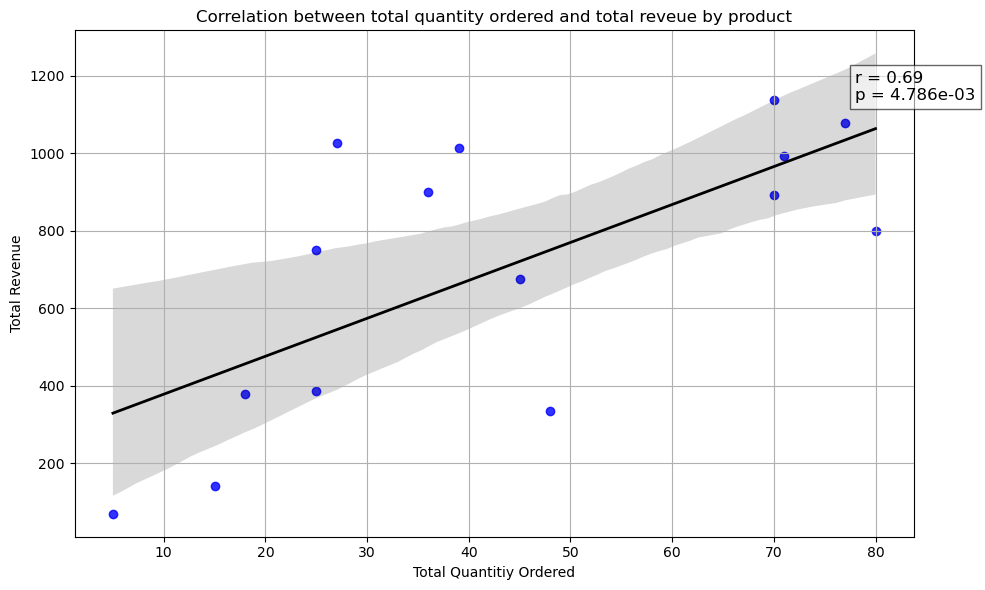

In [ ]:
# Calculate correlation coefficient between total quantity ordered and total revenue by product
r_value, p_value = pearsonr(x=lst_prod_merge_df['total_quantity_ordered'], y=lst_prod_merge_df['total_revenue'])

# Create scatterplot
plt.figure(figsize=(10,6))
sns.regplot(data=lst_prod_merge_df, x='total_quantity_ordered', y='total_revenue', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
plt.text(
    x=lst_prod_merge_df['total_quantity_ordered'].max() - 2,
    y=lst_prod_merge_df['total_revenue'].max() - 0.5,
    s=f"r = {r_value:.2f}\np = {p_value:.3e}",
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.6)
)

# set plot title and axis labels 
plt.title("Correlation between total quantity ordered and total reveue by product")
plt.xlabel("Total Quantitiy Ordered") 
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.grid(True) 


In [37]:
# Question 3 EDA: 
# most_orders_df
most_orders_df

,Country,most_orders
0,USA,29
1,Germany,25
2,Brazil,19
3,France,18
4,Austria,13
5,UK,12
6,Venezuela,9
7,Mexico,9


In [38]:
# no_orders_df
no_orders_df

,Country,no_orders
0,USA,5
1,France,4
2,Germany,2
3,Argentina,2
4,UK,1
5,Spain,1
6,Canada,1
7,Belgium,1


In [39]:
# Merge and clean
most_no_orders_merge_df = pd.merge(most_orders_df, no_orders_df, on='Country', how='outer').fillna(0)
most_no_orders_merge_df['most_orders'] = most_no_orders_merge_df['most_orders']
most_no_orders_merge_df['no_orders'] = most_no_orders_merge_df['no_orders']

most_no_orders_merge_df.sort_values(by="most_orders", ascending=False)

,Country,most_orders,no_orders
10,USA,29.0,5.0
6,Germany,25.0,2.0
3,Brazil,19.0,0.0
5,France,18.0,4.0
1,Austria,13.0,0.0
9,UK,12.0,1.0
11,Venezuela,9.0,0.0
7,Mexico,9.0,0.0
2,Belgium,0.0,1.0
0,Argentina,0.0,2.0


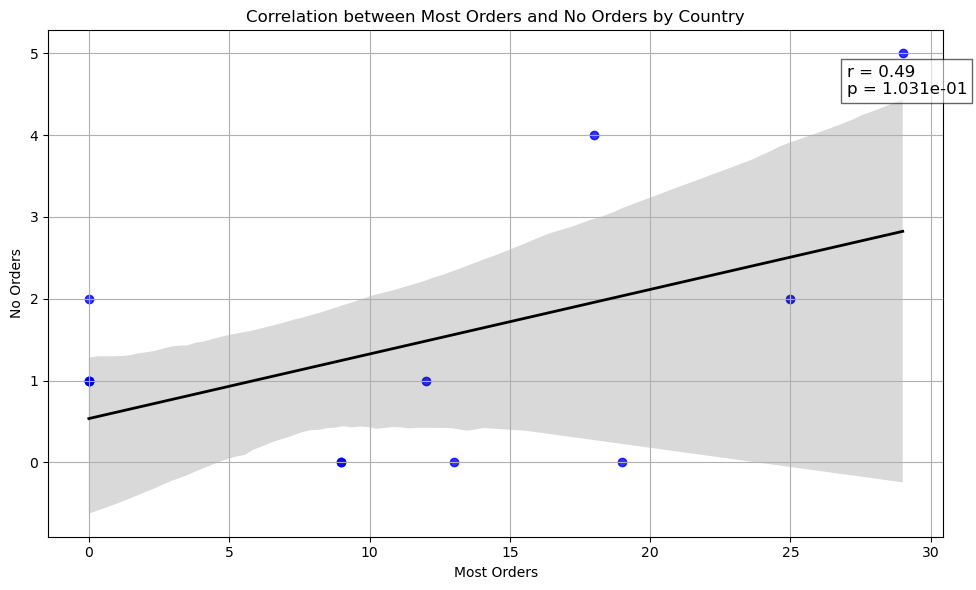

In [40]:
# Calculate correlation coefficient between total quantity ordered and total revenue by product
r_value, p_value = pearsonr(x=most_no_orders_merge_df['most_orders'], y=most_no_orders_merge_df['no_orders'])

# Create scatterplot
plt.figure(figsize=(10,6))
sns.regplot(data=most_no_orders_merge_df, x='most_orders', y='no_orders', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
plt.text(
    x=most_no_orders_merge_df['most_orders'].max() - 2,
    y=most_no_orders_merge_df['no_orders'].max() - 0.5,
    s=f"r = {r_value:.2f}\np = {p_value:.3e}",
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.6)
)

# set plot title and axis labels 
plt.title("Correlation between Most Orders and No Orders by Country")
plt.xlabel("Most Orders") 
plt.ylabel("No Orders")
plt.tight_layout()
plt.grid(True) 


## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

- According to the bar graph, and corresponding dataframe; USA, Germany, and France have the highest number of customers, with USA=13, Germany=11, and France=11. These countries also have the greatest number of suppliers, with USA=4,Germany=3, and France=3. These developed nation/markets seem to show a moderate balance between customer demand and suppliers.

- According to the scatter plot visualization we see a moderately positive correlation between customer and supllier count with r=0.69. The relationship is statistically signigicant with p=0.002. This suggest that customer presence does predict supplier presence. 

- The observations from the dataframe, bar graph, and scatter plot also shows:
  - That Brazil has customers=9 but suppliers=0, indicating a high demand, low local supply dynamic — could possibly point to a reliance on imports.
  - Japan, Sweden, and Australia have customers=0 but suppliers=2 each, which could possibly suggest an export-heavy or manufacturing region/enviroment. 




### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

- According to the dataframe output, the least popular product by order quantity is Laughing Lumberjack Lager, with only 5 units ordered. Analyzing the correlation between total quantity ordered and total revenue shows a statistically significant strong positive relationship with r = 0.69 and p ≈ 0.0048, indicating that products ordered more frequently tend to generate significantly higher revenue.
  - This trend is visualized in the scatterplot above, where most higher-order quantities align with greater total revenue — though a few outliers exist.

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

- According to the dataframe output, the country with the most orders is USA=29. The Pearson correlation coefficient r = 0.49 with a p-value ≈ 0.1031, indicates a moderate positive correlation, but not statistically significant, given p > 0.05.
  - This may sugges that while there is a slight trend where countries with more orders also have more inactive customers--perhaps due to a larger customer base, the relationship is not strong enough to be considereed conclusive.
- Also notable: the U.S. has both the most orders and the most non-ordering customers--this may suggests a large customer base...
  - Countries like Brazil and Austria have high order counts and zero non-ordering customers--which may indicate engaged customer base(s)...
  - Countries like Argentina, Belgium, and Spain have no orders and some inactive customers--which may suggest low engagement...



### Question 4

Which supplier has the most orders? Which evidence supports your answer?

- According to the Bar Graph and SQL-Query output, the supplier with the most orders is Plutzer Lebensmittelgroßmärkte AG with 42 orders. The supplier Pavlova Ltd. has two orders less with 40 orders. 
